### Import libraries

In [2]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import pandas as pd
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string

from ast import literal_eval

from mlrose_hiive import TSPGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\akoutras\AppData\Local\Temp\ipykernel_21788\854251365.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


#### 1d) TSP - GA

In [18]:
# Large set
size = 30

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    # create a runner class and solve the problem
    ga = GARunner(problem=problem,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,601),
              max_attempts=500,
              population_sizes=[100, 200, 300, 400, 500, 600],
              mutation_rates=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = ga.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_large = df_run_stats[['Iteration']]
df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_large = df_run_stats[['Iteration']]
df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_large = df_run_stats[['Iteration']]
df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_large['std'] = df_time_seed[column_list].std(axis=1)

df_ga_large = df_run_stats[['Iteration']]
df_ga_large['Fitness_mean'] = df_fitness_large['mean']
df_ga_large['Fitness_std']  = df_fitness_large['std']
df_ga_large['FEvals_mean']  = df_fevals_large['mean']
df_ga_large['FEvals_std']   = df_fevals_large['std']
df_ga_large['Time_mean']    = df_time_large['mean']
df_ga_large['Time_std']     = df_time_large['std']
df_ga_large['Population Size']  = df_run_stats[['Population Size']]
df_ga_large['Mutation Rate']  = df_run_stats[['Mutation Rate']]

df_ga_large.to_csv('df_ga_large.csv')

In [19]:
best_fitness_ga_large = df_ga_large['Fitness_mean'].min()
best_runs_ga_large = df_ga_large[df_ga_large['Fitness_mean'] == best_fitness_ga_large]
best_runs_ga_large.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
21388,353,1115.387137,29.723366,212802.2,8.642916,112.059201,14.624462,600,0.2
21389,354,1115.387137,29.723366,213403.2,8.642916,112.414317,14.696236,600,0.2
21390,355,1115.387137,29.723366,214004.2,8.642916,112.756562,14.732430,600,0.2
21391,356,1115.387137,29.723366,214605.2,8.642916,113.088274,14.770307,600,0.2
21392,357,1115.387137,29.723366,215206.2,8.642916,113.426601,14.831175,600,0.2


In [20]:
minimum_evaluations_ga_large = best_runs_ga_large['FEvals_mean'].min()
best_curve_run_ga_large = best_runs_ga_large[best_runs_ga_large['FEvals_mean'] == minimum_evaluations_ga_large]
minimum_time_ga_large = best_curve_run_ga_large['Time_mean'].min()
best_curve_run_ga_large = best_curve_run_ga_large[best_curve_run_ga_large['Time_mean'] == minimum_time_ga_large]
best_curve_run_ga_large

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
21388,353,1115.387137,29.723366,212802.2,8.642916,112.059201,14.624462,600,0.2


In [ ]:
minimum_time_ga_large = best_runs_ga_large['Time_mean'].min()
best_curve_run_ga_large = best_runs_ga_large[best_runs_ga_large['Time_mean'] == minimum_time_ga_large]
best_curve_run_ga_large

In [30]:
# Large set
size = 30

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    # create a runner class and solve the problem
    ga = GARunner(problem=problem,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,501),
              max_attempts=500,
              population_sizes=[500, 750, 1000, 1500],
              mutation_rates=[0.1, 0.2, 0.3, 0.4, 0.5])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = ga.run()
        
    if i==1:
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_large = df_run_stats[['Iteration']]
df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_large = df_run_stats[['Iteration']]
df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_large = df_run_stats[['Iteration']]
df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_large['std'] = df_time_seed[column_list].std(axis=1)

df_ga_large = df_run_stats[['Iteration']]
df_ga_large['Fitness_mean'] = df_fitness_large['mean']
df_ga_large['Fitness_std']  = df_fitness_large['std']
df_ga_large['FEvals_mean']  = df_fevals_large['mean']
df_ga_large['FEvals_std']   = df_fevals_large['std']
df_ga_large['Time_mean']    = df_time_large['mean']
df_ga_large['Time_std']     = df_time_large['std']
df_ga_large['Population Size']  = df_run_stats[['Population Size']]
df_ga_large['Mutation Rate']  = df_run_stats[['Mutation Rate']]

df_ga_large.to_csv('df_ga_large1.csv')

In [3]:
df_ga_large = pd.read_csv('df_ga_large1.csv')

best_fitness_ga_large = df_ga_large['Fitness_mean'].min()
best_runs_ga_large = df_ga_large[df_ga_large['Fitness_mean'] == best_fitness_ga_large]
best_runs_ga_large.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
5724,5724,213,1113.15224,12.979045,214266.4,2.701851,56.815764,0.591565,1000,0.2
5725,5725,214,1113.15224,12.979045,215267.4,2.701851,57.075187,0.594819,1000,0.2
5726,5726,215,1113.15224,12.979045,216268.4,2.701851,57.327727,0.586976,1000,0.2
5727,5727,216,1113.15224,12.979045,217269.4,2.701851,57.589305,0.590683,1000,0.2
5728,5728,217,1113.15224,12.979045,218270.4,2.701851,57.863132,0.603212,1000,0.2


In [4]:
minimum_evaluations_ga_large = best_runs_ga_large['FEvals_mean'].min()
best_curve_run_ga_large = best_runs_ga_large[best_runs_ga_large['FEvals_mean'] == minimum_evaluations_ga_large]
minimum_time_ga_large = best_curve_run_ga_large['Time_mean'].min()
best_curve_run_ga_large = best_curve_run_ga_large[best_curve_run_ga_large['Time_mean'] == minimum_time_ga_large]
best_curve_run_ga_large

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
5724,5724,213,1113.15224,12.979045,214266.4,2.701851,56.815764,0.591565,1000,0.2


In [5]:
minimum_time_ga_large = best_runs_ga_large['Time_mean'].min()
best_curve_run_ga_large = best_runs_ga_large[best_runs_ga_large['Time_mean'] == minimum_time_ga_large]
best_curve_run_ga_large

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
5724,5724,213,1113.15224,12.979045,214266.4,2.701851,56.815764,0.591565,1000,0.2


In [21]:
# Medium set
size = 15

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    # create a runner class and solve the problem
    ga = GARunner(problem=problem,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,601),
              max_attempts=500,
              population_sizes=[100, 200, 300, 400, 500, 600],
              mutation_rates=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = ga.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_medium = df_run_stats[['Iteration']]
df_fitness_medium['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_medium['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_medium = df_run_stats[['Iteration']]
df_fevals_medium['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_medium['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_medium = df_run_stats[['Iteration']]
df_time_medium['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_medium['std'] = df_time_seed[column_list].std(axis=1)

df_ga_medium = df_run_stats[['Iteration']]
df_ga_medium['Fitness_mean'] = df_fitness_medium['mean']
df_ga_medium['Fitness_std']  = df_fitness_medium['std']
df_ga_medium['FEvals_mean']  = df_fevals_medium['mean']
df_ga_medium['FEvals_std']   = df_fevals_medium['std']
df_ga_medium['Time_mean']    = df_time_medium['mean']
df_ga_medium['Time_std']     = df_time_medium['std']
df_ga_medium['Population Size']  = df_run_stats[['Population Size']]
df_ga_medium['Mutation Rate']  = df_run_stats[['Mutation Rate']]

df_ga_medium.to_csv('df_ga_medium.csv')

In [6]:
df_ga_medium = pd.read_csv('df_ga_medium.csv')

best_fitness_ga_medium = df_ga_medium['Fitness_mean'].min()
best_runs_ga_medium = df_ga_medium[df_ga_medium['Fitness_mean'] == best_fitness_ga_medium]
best_runs_ga_medium.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
452,452,452,825.41961,0.0,45769.0,3.674235,7.866808,0.675658,100,0.2
453,453,453,825.41961,0.0,45870.0,3.674235,7.889716,0.671997,100,0.2
454,454,454,825.41961,0.0,45971.0,3.674235,7.907987,0.672911,100,0.2
455,455,455,825.41961,0.0,46072.0,3.674235,7.928008,0.675926,100,0.2
456,456,456,825.41961,0.0,46173.0,3.674235,7.947750,0.677574,100,0.2


In [7]:
minimum_evaluations_ga_medium = best_runs_ga_medium['FEvals_mean'].min()
best_curve_run_ga_medium = best_runs_ga_medium[best_runs_ga_medium['FEvals_mean'] == minimum_evaluations_ga_medium]
minimum_time_ga_medium = best_curve_run_ga_medium['Time_mean'].min()
best_curve_run_ga_medium = best_curve_run_ga_medium[best_curve_run_ga_medium['Time_mean'] == minimum_time_ga_medium]
best_curve_run_ga_medium

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
9659,9659,43,825.41961,0.0,13257.6,1.341641,5.933327,0.325239,300,0.4


In [8]:
minimum_time_ga_medium = best_runs_ga_medium['Time_mean'].min()
best_curve_run_ga_medium = best_runs_ga_medium[best_runs_ga_medium['Time_mean'] == minimum_time_ga_medium]
best_curve_run_ga_medium

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
9659,9659,43,825.41961,0.0,13257.6,1.341641,5.933327,0.325239,300,0.4


In [24]:
# Small set
size = 5

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    # create a runner class and solve the problem
    ga = GARunner(problem=problem,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,601),
              max_attempts=500,
              population_sizes=[100, 200, 300, 400, 500],
              mutation_rates=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = ga.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_small = df_run_stats[['Iteration']]
df_fitness_small['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_small['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_small = df_run_stats[['Iteration']]
df_fevals_small['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_small['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_small = df_run_stats[['Iteration']]
df_time_small['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_small['std'] = df_time_seed[column_list].std(axis=1)

df_ga_small = df_run_stats[['Iteration']]
df_ga_small['Fitness_mean'] = df_fitness_small['mean']
df_ga_small['Fitness_std']  = df_fitness_small['std']
df_ga_small['FEvals_mean']  = df_fevals_small['mean']
df_ga_small['FEvals_std']   = df_fevals_small['std']
df_ga_small['Time_mean']    = df_time_small['mean']
df_ga_small['Time_std']     = df_time_small['std']
df_ga_small['Population Size']  = df_run_stats[['Population Size']]
df_ga_small['Mutation Rate']  = df_run_stats[['Mutation Rate']]

df_ga_small.to_csv('df_ga_small.csv')

In [9]:
df_ga_small = pd.read_csv('df_ga_small.csv')

best_fitness_ga_small = df_ga_small['Fitness_mean'].min()
best_runs_ga_small = df_ga_small[df_ga_small['Fitness_mean'] == best_fitness_ga_small]
best_runs_ga_small.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
1,1,1,360.984004,0.0,202.0,0.0,0.015846,0.003034,100,0.2
2,2,2,360.984004,0.0,303.0,0.0,0.026759,0.003517,100,0.2
3,3,3,360.984004,0.0,404.0,0.0,0.037659,0.003055,100,0.2
4,4,4,360.984004,0.0,505.0,0.0,0.048313,0.003261,100,0.2
5,5,5,360.984004,0.0,606.0,0.0,0.061193,0.007333,100,0.2


In [10]:
minimum_evaluations_ga_small = best_runs_ga_small['FEvals_mean'].min()
best_curve_run_ga_small = best_runs_ga_small[best_runs_ga_small['FEvals_mean'] == minimum_evaluations_ga_small]
minimum_time_ga_small = best_curve_run_ga_small['Time_mean'].min()
best_curve_run_ga_small = best_curve_run_ga_small[best_curve_run_ga_small['Time_mean'] == minimum_time_ga_small]
best_curve_run_ga_small

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
1,1,1,360.984004,0.0,202.0,0.0,0.015846,0.003034,100,0.2


In [11]:
minimum_time_ga_small = best_runs_ga_small['Time_mean'].min()
best_curve_run_ga_small = best_runs_ga_small[best_runs_ga_small['Time_mean'] == minimum_time_ga_small]
best_curve_run_ga_small

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Population Size,Mutation Rate
1,1,1,360.984004,0.0,202.0,0.0,0.015846,0.003034,100,0.2


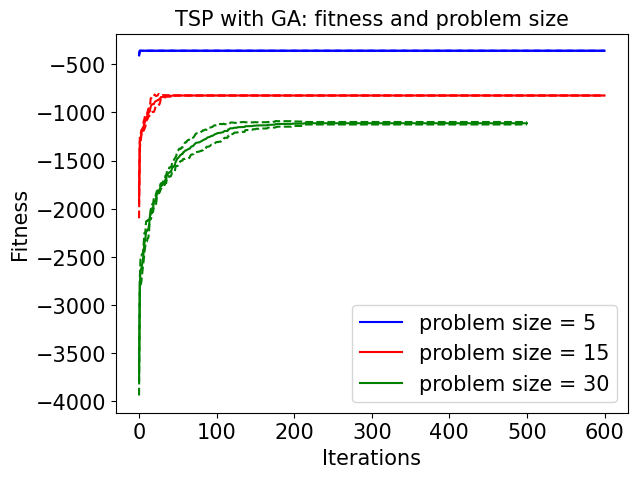

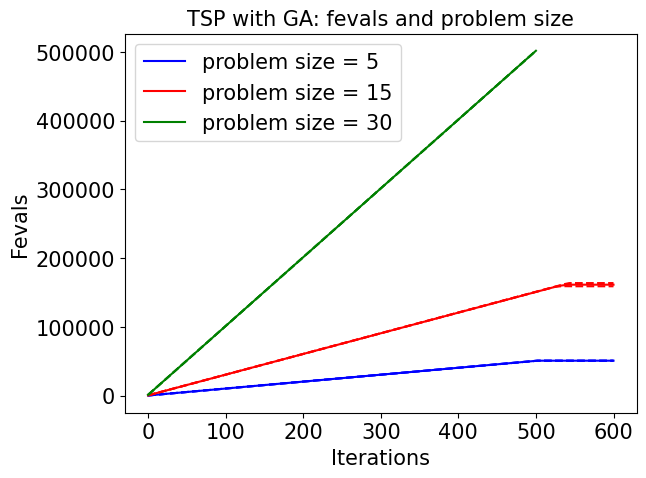

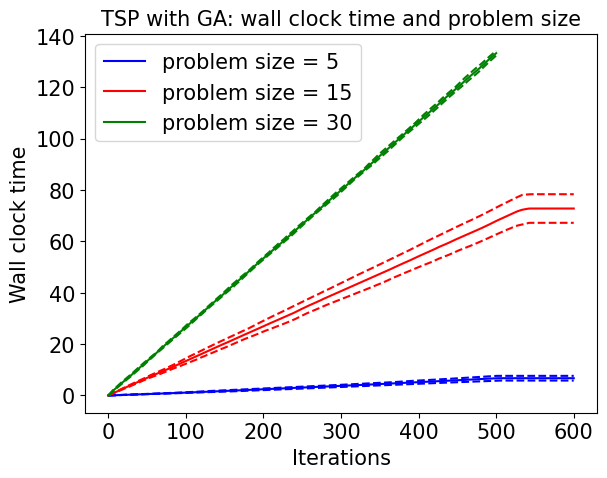

In [34]:
#fontsize = 15
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
#ax.plot(df_ga_small[df_ga_small['Population Size']==20][df_ga_small['Mutation Rate']==0.3]['Iteration'].values, 
#        -df_ga_small[df_ga_small['Population Size']==20][df_ga_small['Mutation Rate']==0.3]['Fitness_mean'].values, 
#        label='problem size = 5')
#
#ax.plot(df_ga_medium[df_ga_medium['Population Size']==75][df_ga_medium['Mutation Rate']==0.6]['Iteration'].values, 
#        -df_ga_medium[df_ga_medium['Population Size']==75][df_ga_medium['Mutation Rate']==0.6]['Fitness_mean'].values, 
#        label='problem size = 15')
#
#ax.plot(df_ga_large[df_ga_large['Population Size']==200][df_ga_large['Mutation Rate']==0.4]['Iteration'].values, 
#        -df_ga_large[df_ga_large['Population Size']==200][df_ga_large['Mutation Rate']==0.4]['Fitness_mean'].values, 
#        label='problem size = 40')
#
#ax.legend(fontsize=fontsize)
#ax.set_title('GA Fitness and problem size', fontsize=fontsize)
#ax.tick_params(labelsize=fontsize)
#ax.set_xlabel('Iterations', fontsize=fontsize) 
#ax.set_ylabel('Fitness', fontsize=fontsize)
##ax.set_ylim(0.6, 1.02)
##ax.set_xlim(0, 4000)
##fig.savefig('DT-learning_curves-roc_auc.png')
#plt.show()
#plt.close(fig)



fontsize = 15
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
       -df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values, label='problem size = 5', color='b')
ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
      -(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values +
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_std'].values),'--b')
ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
      -(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values -
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_std'].values), '--b')

ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
       -df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_mean'].values, label='problem size = 15', color='r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
      -(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_std'].values),'--r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
      -(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_std'].values), '--r')

ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
       -df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_mean'].values, label='problem size = 30', color='g')
ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
      -(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_mean'].values +
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_std'].values), '--g')
ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
      -(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_mean'].values -
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_std'].values), '--g')

ax.legend(fontsize=fontsize)
ax.set_title('TSP with GA: fitness and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values, label='problem size = 5', color='b')
ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values +
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_std'].values,'--b')
ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values -
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_std'].values, '--b')

ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_mean'].values, label='problem size = 15', color='r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_std'].values,'--r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_std'].values, '--r')

ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_mean'].values, label='problem size = 30', color='g')
ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_mean'].values +
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_std'].values, '--g')
ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_mean'].values -
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('TSP with GA: fevals and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values, label='problem size = 5', color='b')
ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values +
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_std'].values,'--b')
ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values -
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_std'].values, '--b')

ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_mean'].values, label='problem size = 15', color='r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_std'].values,'--r')
ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_std'].values, '--r')

ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_mean'].values, label='problem size = 30', color='g')
ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_mean'].values +
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_std'].values, '--g')
ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_mean'].values -
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('TSP with GA: wall clock time and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)
